In [1]:
!rm df-*-checkpoint.csv

zsh:1: no matches found: df-*-checkpoint.csv


In [1]:
import os
import glob

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load all datasets

In [3]:
all_files = glob.glob("*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))
df = df.drop_duplicates()
print(df.shape)

(1570, 20)


In [4]:
df['Exp']

0     exp15
1     exp15
2     exp15
3     exp15
4     exp15
      ...  
65    exp14
66    exp14
67    exp14
68    exp14
69    exp14
Name: Exp, Length: 1570, dtype: object

In [5]:
df['Exp'].astype('category').cat.remove_unused_categories()

0     exp15
1     exp15
2     exp15
3     exp15
4     exp15
      ...  
65    exp14
66    exp14
67    exp14
68    exp14
69    exp14
Name: Exp, Length: 1570, dtype: category
Categories (16, object): ['exp0', 'exp1', 'exp10', 'exp11', ..., 'exp6', 'exp7', 'exp8', 'exp9']

In [6]:
df['Orchestrator'] = df['Orchestrator'].astype('category')
df['Benchmark'] = df['Benchmark'].astype('category')

df['Exp'] = df['Exp'].astype('category')
# df['Latency'] = df['Latency']
df['Requests'] = df['Requests'].astype(int)

In [9]:
df_0 = df.loc[df['Exp'] == 'exp0']
df_1 = df.loc[df['Exp'] == 'exp1']
df_2 = df.loc[df['Exp'] == 'exp2']
df_3 = df.loc[df['Exp'] == 'exp3']
df_4 = df.loc[df['Exp'] == 'exp4']
df_5 = df.loc[df['Exp'] == 'exp5']
df_6 = df.loc[df['Exp'] == 'exp6']
df_7 = df.loc[df['Exp'] == 'exp7']
df_8 = df.loc[df['Exp'] == 'exp8']
df_9 = df.loc[df['Exp'] == 'exp9']
df_10 = df.loc[df['Exp'] == 'exp10']
df_11 = df.loc[df['Exp'] == 'exp11']

In [7]:
df_12 = df.loc[(df['Exp'] == 'exp12')]
df_13 = df.loc[(df['Exp'] == 'exp13')]
df_14 = df.loc[(df['Exp'] == 'exp14')]
df_15 = df.loc[(df['Exp'] == 'exp15')]
df_all_orch = pd.concat([df_12, df_13, df_14, df_15])
df_all_orch['Exp'] = df_all_orch['Exp'].cat.remove_unused_categories()
df_12_swarm = df.loc[(df['Exp'] == 'exp12') & (df['Orchestrator'] == 'swarm')]
df_13_swarm = df.loc[(df['Exp'] == 'exp13') & (df['Orchestrator'] == 'swarm')]
df_14_swarm = df.loc[(df['Exp'] == 'exp14') & (df['Orchestrator'] == 'swarm')]
df_15_swarm = df.loc[(df['Exp'] == 'exp15') & (df['Orchestrator'] == 'swarm')]
df_12_nomad = df.loc[(df['Exp'] == 'exp12') & (df['Orchestrator'] == 'nomad')]
df_13_nomad = df.loc[(df['Exp'] == 'exp13') & (df['Orchestrator'] == 'nomad')]
df_14_nomad = df.loc[(df['Exp'] == 'exp14') & (df['Orchestrator'] == 'nomad')]
df_15_nomad = df.loc[(df['Exp'] == 'exp15') & (df['Orchestrator'] == 'nomad')]
df_12_k8s = df.loc[(df['Exp'] == 'exp12') & (df['Orchestrator'] == 'k8s')]
df_13_k8s = df.loc[(df['Exp'] == 'exp13') & (df['Orchestrator'] == 'k8s')]
df_14_k8s = df.loc[(df['Exp'] == 'exp14') & (df['Orchestrator'] == 'k8s')]
df_15_k8s = df.loc[(df['Exp'] == 'exp15') & (df['Orchestrator'] == 'k8s')]

In [8]:
# Global settings
fontsize = 20
legend_location = "lower right"

# Exp12 Swarm

In [9]:
df_12.columns

Index(['Latency', 'Requests', 'Throughput', 'Measured_Throughput', 'Baseline',
       'Orchestrator', 'Benchmark', 'Infinite', 'Exp', 'N', 'Availability',
       'Horizontal', 'Vertical', 'Threads', 'Connections', 'Duration', 'Mean',
       'Max', 'StdDev', 'ReqSec'],
      dtype='object')

In [11]:
df_12_swarm.iloc[:,[0,1,2,5,4,3,9,-4,-3,-2,-1]]

,Latency,Requests,Throughput,Orchestrator,Baseline,Measured_Throughput,N,Mean,Max,StdDev,ReqSec
20,3.98,500,14922.0,swarm,0,9876,NaN,2.878,26.640,0.741,497.36
27,6.94,500,14815.0,swarm,0,9900,NaN,2.594,24.256,1.731,493.40
29,7.75,500,14815.0,swarm,0,9900,NaN,2.571,11.296,1.642,493.30
35,21640.00,1000,10356.0,swarm,0,7033,NaN,12884.337,24788.992,4122.938,344.89
38,6.39,1000,29634.0,swarm,0,19874,NaN,2.083,13.208,1.316,987.74
...,...,...,...,...,...,...,...,...,...,...,...
100,25560.00,10000,43707.0,swarm,0,28759,1.0,16874.964,27000.832,4942.575,1456.08
101,27740.00,10000,37232.0,swarm,0,24703,1.0,15469.500,29294.592,5545.055,1241.07
102,28050.00,10000,21748.0,swarm,0,14552,5.0,18012.807,28983.296,5735.942,724.36
103,27670.00,10000,23996.0,swarm,0,15914,4.0,17807.913,29114.368,5743.077,798.43


In [14]:
# df_12_swarm['Exp'] = df['Exp'].replace(['exp12','exp13','exp14','exp15'],
                              # ['baseline', 'vertical', 'horizontal', 'availability'])

/Users/stvdputten/Documents/Projects/Study/Orchestration/Dataset/venv/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

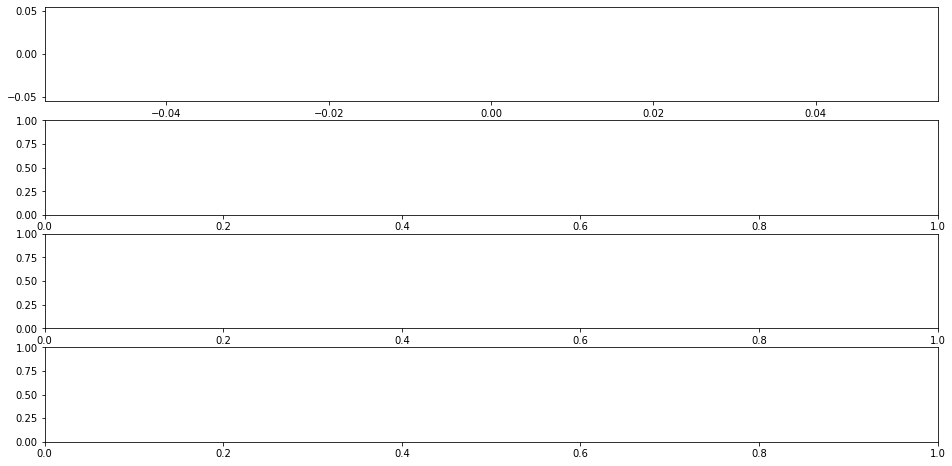

In [13]:
# Exp5
fig, ax = plt.subplots(4, 1, figsize=(16,8))
xticks = df_12_swarm['Requests'].unique()

plt.subplot(411)
p = sns.lineplot(x="Requests", y="Latency", data=df_12_swarm, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.axes.xaxis.set_visible(False)
# p.axes.yaxis.set_visible(False)
plt.ylabel("")
p.set_xticks(xticks)

# plt.ylabel('Latency (milliseconds)', fontsize=12)


# Exp7
plt.subplot(412)
p = sns.lineplot(x="Requests", y="Latency", data=df_13_swarm, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.axes.xaxis.set_visible(False)
plt.ylabel("")


# Exp
plt.subplot(413)
p = sns.lineplot(x="Requests", y="Latency", data=df_14_swarm, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
plt.ylabel('Latency (milliseconds)', fontsize=20)
p.axes.xaxis.set_visible(False)
plt.ylabel('Latency (milliseconds)', fontsize=20)

p.set_xticks(xticks)

# Exp8
plt.subplot(414)
p = sns.lineplot(x="Requests", y="Latency", data=df_15_swarm, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.set_xticks(xticks)
# plt.ylabel('Latency (milliseconds)', fontsize=12)
plt.ylabel("")

plt.xticks(rotation = 45, fontsize=12)
plt.xlabel('Requests', fontsize=20)


# plt.ylabel()
labels = ["hr", "sn", "mm"]
plt.legend(labels, loc="lower right", fontsize=15)
# plt.ylabel("
plt.savefig("Figures/exp12-13-14-15-swarm", bbox_inches='tight')

/Users/stvdputten/Documents/Projects/Study/Orchestration/Dataset/venv/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

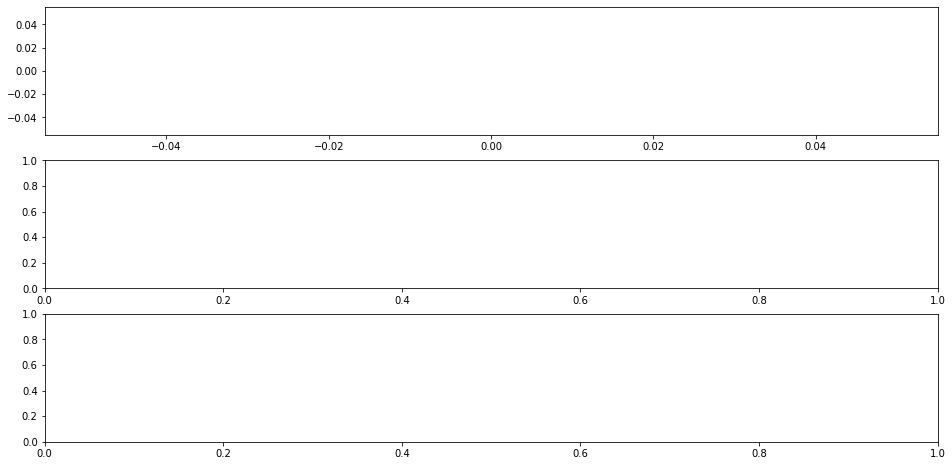

In [14]:
# swarm
fig, ax = plt.subplots(3, 1, figsize=(16,8))
xticks = df_12_nomad['Requests'].unique()

plt.subplot(311)
p = sns.lineplot(x="Requests", y="Latency", data=df_12_swarm, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.axes.xaxis.set_visible(False)
plt.axhline(y=20000, c='red', linestyle='dashed', label="horizontal")
# p.axes.yaxis.set_visible(False)
plt.ylabel("")
p.set_xticks(xticks)

# plt.ylabel('Latency (milliseconds)', fontsize=12)


# k8s
plt.subplot(312)
p = sns.lineplot(x="Requests", y="Latency", data=df_12_k8s, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
plt.ylabel('Latency (milliseconds)', fontsize=20)
p.axes.xaxis.set_visible(False)
plt.axhline(y=20000, c='red', linestyle='dashed', label="horizontal")



# nomad
plt.subplot(313)
p = sns.lineplot(x="Requests", y="Latency", data=df_12_nomad, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.set_xticks(xticks)
plt.axhline(y=20000, c='red', linestyle='dashed', label="horizontal")

# plt.ylabel('Latency (milliseconds)', fontsize=12)
plt.ylabel("")

plt.xticks(rotation = 45, fontsize=12)
plt.xlabel('Requests', fontsize=20)

# plt.ylabel()
labels = ["sn", "mm", "hr"]

# plt.legend(labels, fontsize=15)
plt.savefig("Figures/baseline-swarm-k8s-nomad", bbox_inches='tight')

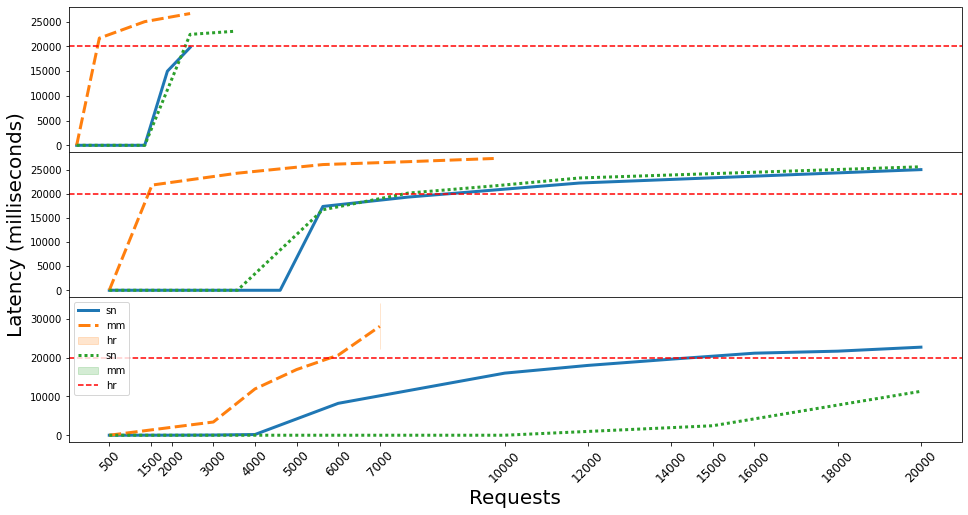

In [53]:
# swarm
fig, ax = plt.subplots(3, 1, gridspec_kw={'hspace': 0}, figsize=(16,8))
xticks = df_12_nomad['Requests'].unique()

plt.subplot(311)
p = sns.lineplot(x="Requests", y="Latency", data=df_12_swarm, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.axes.xaxis.set_visible(False)
plt.axhline(y=20000, c='red', linestyle='dashed', label="horizontal")
# p.axes.yaxis.set_visible(False)
plt.ylabel("")
p.set_xticks(xticks)

# plt.ylabel('Latency (milliseconds)', fontsize=12)


# k8s
plt.subplot(312)
p = sns.lineplot(x="Requests", y="Latency", data=df_12_k8s, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
plt.ylabel('Latency (milliseconds)', fontsize=20)
p.axes.xaxis.set_visible(False)
plt.axhline(y=20000, c='red', linestyle='dashed', label="horizontal")



# nomad
plt.subplot(313)
p = sns.lineplot(x="Requests", y="Latency", data=df_12_nomad, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.set_xticks(xticks)
plt.axhline(y=20000, c='red', linestyle='dashed', label="horizontal")

# plt.ylabel('Latency (milliseconds)', fontsize=12)
plt.ylabel("")

plt.xticks(rotation = 45, fontsize=12)
plt.xlabel('Requests', fontsize=20)

# plt.ylabel("")
labels = ["sn", "mm", "hr"] * 2
plt.legend(labels)



# plt.legend(labels, fontsize=15)
plt.savefig("Figures/baseline-swarm-k8s-nomad", bbox_inches='tight')

In [18]:
df_12

,Latency,Requests,Throughput,Measured_Throughput,Baseline,Orchestrator,Benchmark,Infinite,Exp,Availability,Horizontal,Vertical,Threads,Connections,Duration,Mean,Max,StdDev,ReqSec
20,3.98,500,14922.0,9876,0,swarm,mm,1,exp12,0,1,1,4,512,30,2.878,26.640,0.741,497.36
27,6.94,500,14815.0,9900,0,swarm,sn,1,exp12,0,1,1,4,512,30,2.594,24.256,1.731,493.40
29,7.75,500,14815.0,9900,0,swarm,hr,1,exp12,0,1,1,4,512,30,2.571,11.296,1.642,493.30
35,21640.00,1000,10356.0,7033,0,swarm,mm,1,exp12,0,1,1,4,512,30,12884.337,24788.992,4122.938,344.89
38,6.39,1000,29634.0,19874,0,swarm,hr,1,exp12,0,1,1,4,512,30,2.083,13.208,1.316,987.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,2450.00,15000,433454.0,287451,0,nomad,sn,1,exp12,0,1,1,4,512,30,404.991,6197.248,534.413,14448.74
27,21140.00,16000,143494.0,95620,0,nomad,hr,1,exp12,0,1,1,4,512,30,13766.897,23199.744,4064.565,4783.21
28,21660.00,18000,148093.0,97874,0,nomad,hr,1,exp12,0,1,1,4,512,30,14166.785,23412.736,4150.793,4935.83
29,22690.00,20000,144710.0,96192,0,nomad,hr,1,exp12,0,1,1,4,512,30,14933.868,24018.944,4374.076,4823.77


In [66]:
df_all_orch['Exp'] = df_all_orch['Exp'].replace(['exp12','exp13','exp14','exp15'],
                              ['baseline', 'vertical 2x', 'horizontal 2x', 'high availability off'])

In [63]:
df_all_orch['Exp'].cat.remove_unused_categories()

20                 baseline
27                 baseline
29                 baseline
35                 baseline
38                 baseline
              ...          
21    high availability off
22    high availability off
23    high availability off
24    high availability off
25    high availability off
Name: Exp, Length: 268, dtype: category
Categories (4, object): ['baseline', 'vertical', 'horizontal', 'high availability off']

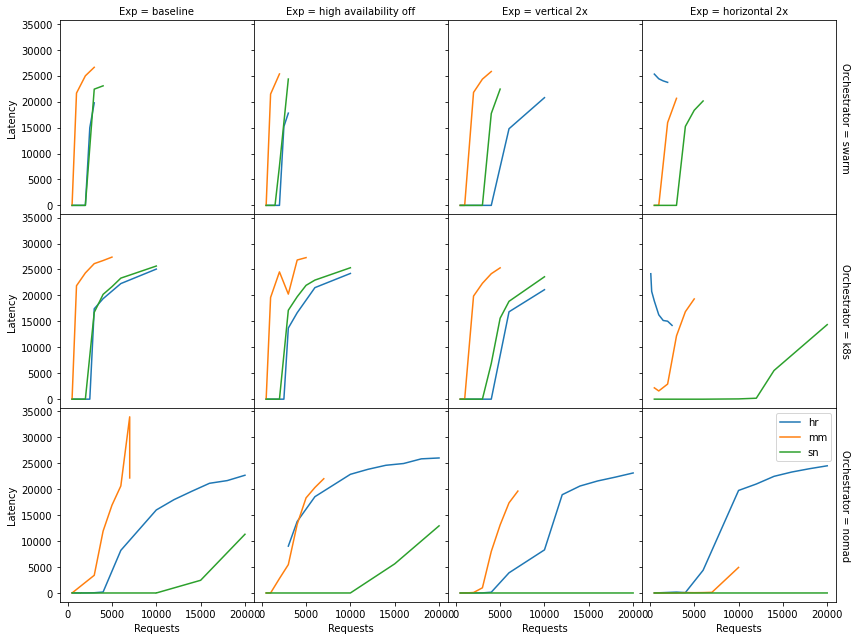

In [72]:
g = sns.FacetGrid(df_all_orch, col="Exp", row="Orchestrator", margin_titles=True, despine=False, hue="Benchmark",
                  col_order=['baseline', 'high availability off', 'vertical 2x', 'horizontal 2x'], 
                  row_order=['swarm','k8s','nomad'])
g.map(plt.plot, "Requests", "Latency")
# g.figure.subplots_adjust(wspace=0)
g.figure.subplots_adjust(wspace=0, hspace=0)
plt.legend()
plt.savefig("Figures/all-exp-swarm-k8s-nomad", bbox_inches='tight')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '100'),
  Text(1, 0, '200'),
  Text(2, 0, '500'),
  Text(3, 0, '1000'),
  Text(4, 0, '1500'),
  Text(5, 0, '2000'),
  Text(6, 0, '2500'),
  Text(7, 0, '3000'),
  Text(8, 0, '4000'),
  Text(9, 0, '5000'),
  Text(10, 0, '6000'),
  Text(11, 0, '7000'),
  Text(12, 0, '10000'),
  Text(13, 0, '12000'),
  Text(14, 0, '14000'),
  Text(15, 0, '15000'),
  Text(16, 0, '16000'),
  Text(17, 0, '18000'),
  Text(18, 0, '20000')])

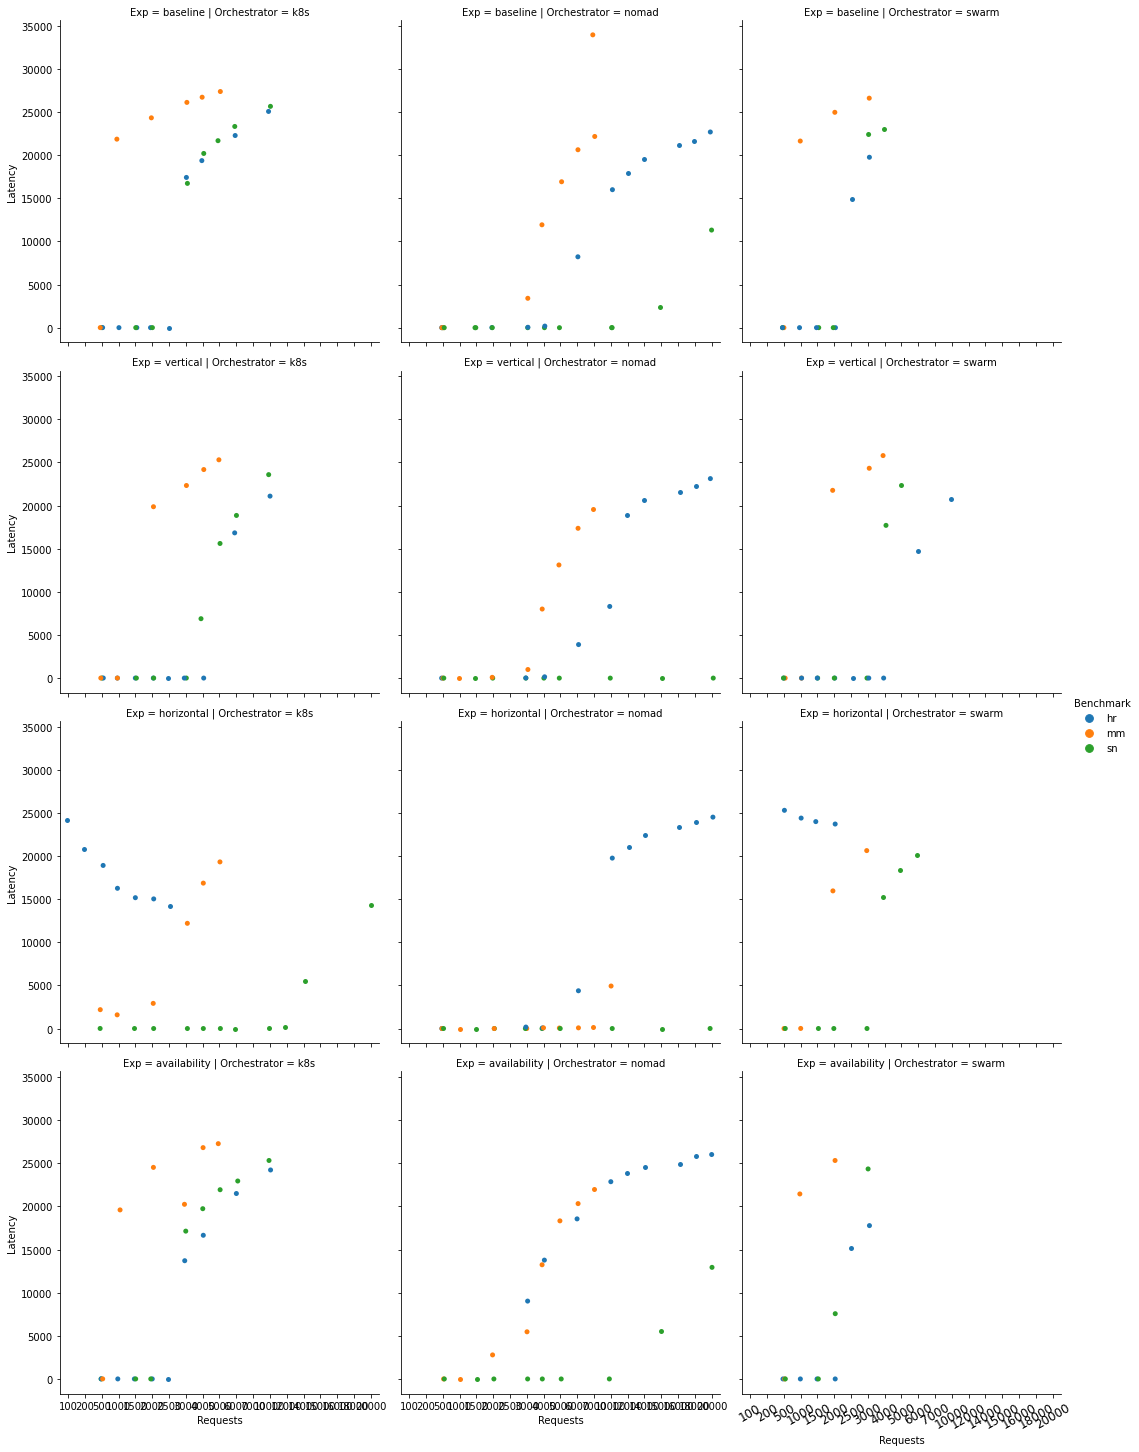

In [55]:
# fig, ax = plt.subplots(3, 1, figsize=(16,8))

sns.catplot(x='Requests', y="Latency", col="Orchestrator", hue="Benchmark", row="Exp", data=df_all_orch)
plt.xticks(rotation = 30, fontsize=12)


In [23]:
df_11_sn = df_11[df_11['Benchmark'] == 'sn']
df_11_mm = df_11[df_11['Benchmark'] == 'mm']
df_11_hr = df_11[df_11['Benchmark'] == 'hr']

In [15]:
p = sns.lineplot(x="Requests", y="Latency", data=df_11_sn, hue="Benchmark", style='Benchmark', linewidth=3, legend="")


NameError: name 'df_11_sn' is not defined

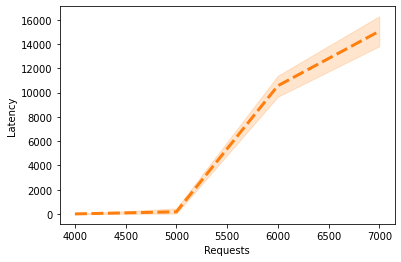

In [25]:
p = sns.lineplot(x="Requests", y="Latency", data=df_11_mm, hue="Benchmark", style='Benchmark', linewidth=3, legend="")


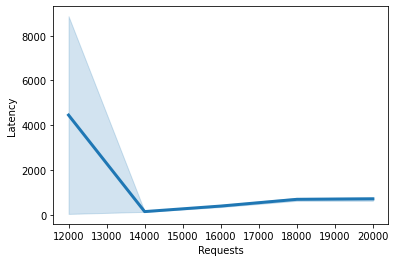

In [26]:
p = sns.lineplot(x="Requests", y="Latency", data=df_11_hr, hue="Benchmark", style='Benchmark', linewidth=3, legend="")


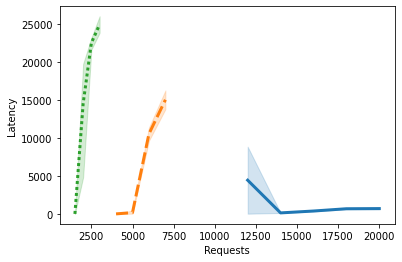

In [27]:
p = sns.lineplot(x="Requests", y="Latency", data=df_11, hue="Benchmark", style='Benchmark', linewidth=3, legend="")


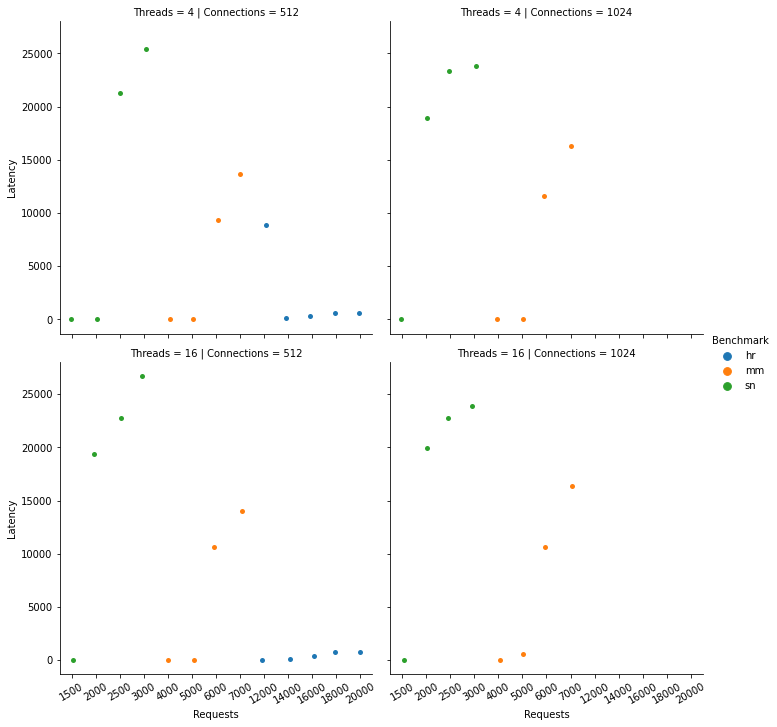

In [28]:
# fig, ax = plt.subplots(figsize=(8,8))
labels = ["sn", "mm", "hr"]
xticks = df_11['Requests'].unique()

p = sns.catplot(x="Requests", y="Latency", col="Connections", row="Threads", data=df_11, hue="Benchmark")
p.set_xticklabels(rotation=30)
# for ax in p.axes[1]:
#     ax.set_xticks(xticks, fontsize=15)
# p.axes[0

# plt.xlim(0)plt.xticks(rotation = 45, fontsize=12)


In [29]:
xticks

array([ 1500,  2000,  2500,  3000,  4000,  5000,  6000,  7000, 12000,
       14000, 16000, 18000, 20000])

In [30]:
g.axes[0][0]

<AxesSubplot:title={'center':'Exp = baseline'}, ylabel='Latency'>

In [31]:
g.axes[0][0].legend()

In [32]:
labels

['sn', 'mm', 'hr']

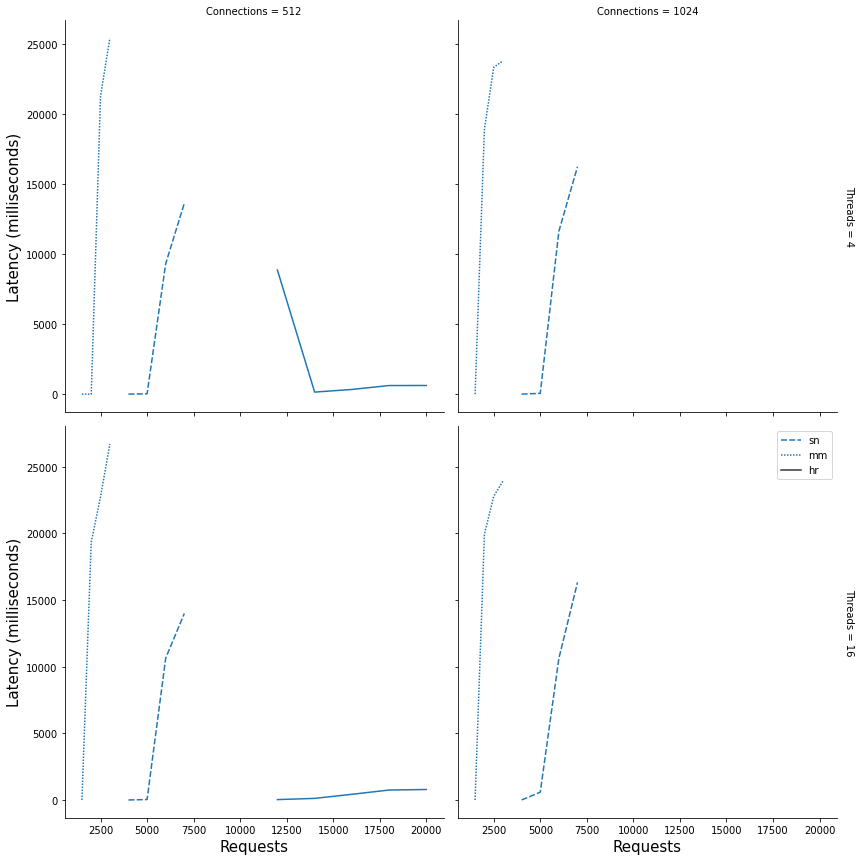

In [33]:
g = sns.FacetGrid(df_11, col='Connections', row="Threads", sharey='row', margin_titles=True, height=6)
g.map_dataframe(sns.lineplot, 'Requests', 'Latency', style="Benchmark")
g.set_ylabels('Latency (milliseconds)', fontsize=15)
g.set_xlabels('Requests', fontsize=15)
# plt.legend()
# g.axes[1][1].set_xlabels(labels)
g.axes[1][1].legend(["sn","mm","hr"])

In [34]:
g = sns.FacetGrid(df_11, col="Connections", row="Threads", hue="Benchmark", height=5)
g.map(plt.plot, x="Requests", "Latency")

# xticks = df_11['Requests'].unique()
g.set_xticklabels(rotation=30, fontsize=10)
g.set_ylabels('Latency (milliseconds)', fontsize=15)
g.set_xlabels('Requests', fontsize=15)
g.axes[0][0].legend(fontsize=15)
# plt.legend(labels, fontsize=15)

plt.xlim(0, 20000)
plt.savefig("Figures/exp11.png", bbox_inches='tight')

SyntaxError: positional argument follows keyword argument (2294702280.py, line 2)

In [ ]:
# Exp5
fig, ax = plt.subplots(3, 1, figsize=(16,8))
xticks = df_7['Requests'].unique()

plt.subplot(311)
p = sns.lineplot(x="Requests", y="Latency", data=df_7, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.axes.xaxis.set_visible(False)
# p.axes.yaxis.set_visible(False)
plt.ylabel("")
p.set_xticks(xticks)

# plt.ylabel('Latency (milliseconds)', fontsize=12)


# Exp7
plt.subplot(312)
p = sns.lineplot(x="Requests", y="Latency", data=df_8, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
plt.ylabel('Latency (milliseconds)', fontsize=20)
p.axes.xaxis.set_visible(False)


# Exp8
plt.subplot(313)
p = sns.lineplot(x="Requests", y="Latency", data=df_9, hue="Benchmark", style='Benchmark', linewidth=3, legend="")
p.set_xticks(xticks)
# plt.ylabel('Latency (milliseconds)', fontsize=12)
plt.ylabel("")

plt.xticks(rotation = 45, fontsize=12)
plt.xlabel('Requests', fontsize=20)

# plt.ylabel()

plt.legend(labels, fontsize=15)
plt.savefig("Figures/exp9-exp8-exp7.png", bbox_inches='tight')